# Pandas 

In this notebook we are going to further explore some of the ***pandas*** operations and plots. 

## Introduction

As usual, let's upload the packages that we need to run the exercise

In [1]:
import numpy as np
import pandas as pd

The first step is to upload the data which consist of credit information for a cross section of 400 individuals. 

In [3]:
df = pd.read_csv('Credit.csv')
df.set_index('Id', inplace = True) # set 'ID' as index of the dataframe
df.head(10) # this is to see the first 10 rows of the dataframe

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
Id,,,,,,,,,,,
1,14.891,3606,283,2,34,11,No,No,Yes,South,333
2,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
3,104.593,7075,514,4,71,11,No,No,No,West,580
4,148.924,9504,681,3,36,11,Yes,No,No,West,964
5,55.882,4897,357,2,68,16,No,No,Yes,South,331
6,80.180,8047,569,4,77,10,No,No,No,South,1151
7,20.996,3388,259,2,37,12,Yes,No,No,East,203
8,71.408,7114,512,2,87,9,No,No,No,West,872
9,15.125,3300,266,5,66,13,Yes,No,No,South,279


Save the names of all input features in a variable called **names** which can be used later for the plots. 

In [4]:
names = df.columns
print(names)

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Own',
       'Student', 'Married', 'Region', 'Balance'],
      dtype='object')


Let drop the non-numerical variables. These are 'Own','Student','Married','Region'

In [7]:
df1 = df.drop(['Education','Own','Student', 'Married', 'Region'], axis = 1)

We now calculate a set of decriptive statistics for the data, such as the mean, the variance, the skewness and the kurtosis.

We notice that variables have a different scale, for instance, credit **Limit** and **Rating** they have a rather different scale. As a good practive we want to rescale the data so that all variables have the same scale. 

In [8]:
# call .std() method to get std of every column
df2 = df1/df1.std()

# .describe() to get all stats per column for df2
df2.describe()

,Income,Limit,Rating,Cards,Age,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,1.283014,2.051643,2.294018,2.156752,3.227138,1.131060
std,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
min,0.293778,0.370419,0.601070,0.729248,1.333348,0.000000
25%,0.596047,1.337840,1.598005,1.458497,2.420317,0.149535
50%,0.939599,2.002644,2.223312,2.187745,3.246413,0.999437
75%,1.630641,2.544300,2.825997,2.916994,4.058016,1.877071
max,5.295442,6.027644,6.346779,6.563236,5.681223,4.347931


We see now that all variables have standard deviation equal to one. Notice that we could also substract the mean that we create a new variable $z=(x-mu)/sd$, where $mu$ is the mean and $sd$ is the sample standard deviation of the data. 

In [11]:
# standardizing the column 𝑧=(𝑥−𝑚𝑢)/𝑠𝑑
df3 = (df1 - df1.mean())/df1.std()
df3.describe()

,Income,Limit,Rating,Cards,Age,Balance
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,-1.033063e-15,-1.566802e-16,1.679212e-17,4.496403e-17,2.196854e-16,2.942091e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.892355e-01,-1.681224e+00,-1.692948e+00,-1.427504e+00,-1.893789e+00,-1.131060e+00
25%,-6.869665e-01,-7.138033e-01,-6.960129e-01,-6.982553e-01,-8.068206e-01,-9.815254e-01
50%,-3.434142e-01,-4.899924e-02,-7.070648e-02,3.099306e-02,1.927558e-02,-1.316233e-01
75%,3.476271e-01,4.926569e-01,5.319790e-01,7.602415e-01,8.308789e-01,7.460106e-01
max,4.012428e+00,3.976001e+00,4.052761e+00,4.406483e+00,2.454085e+00,3.216871e+00


We see now that the mean of the new dataframe **df2** is zero and the variance is equal to one. 

One important function of **pandas** is the function **groupby()**. This allows you to group data (by applying aggregate functions like sum, max, min…) with the same values into summary row. Suppose that for instance we want to calculate the average value of each variable depending on the geographical region where individuals are or if an individual is married or not. 

In [12]:
df.groupby('Region').mean()

,Income,Limit,Rating,Cards,Age,Education,Balance
Region,,,,,,,
East,47.682101,4881.595960,365.070707,2.959596,57.505051,13.525253,531.000000
South,44.521945,4728.462312,354.773869,2.949749,55.653266,13.331658,518.497487
West,44.187833,4607.823529,345.431373,2.970588,53.911765,13.607843,512.313725


In [13]:
df.groupby('Married').mean()

,Income,Limit,Rating,Cards,Age,Education,Balance
Married,,,,,,,
No,43.641090,4645.303226,347.800000,2.974194,57.251613,13.258065,523.290323
Yes,46.217082,4792.726531,359.457143,2.946939,54.665306,13.571429,517.942857


If we want to apply the **groupby()** operator to a specific variable the sintax slightly change. 

In [16]:
# use [[]] and selecct the relevant columns
df[['Married','Income']].groupby('Married').mean()

,Income
Married,
No,43.641090
Yes,46.217082


If we want to apply the **groupby()** operator to multiple variables we just need to expand the list in the squared brackets. 

In [15]:
df[['Married','Income','Rating']].groupby('Married').mean()

,Income,Rating
Married,,
No,43.641090,347.800000
Yes,46.217082,359.457143


## Plotting variables with ***pandas***

In this section we are going to introduce some of the plotting operators which are built in ***pandas***

Suppose I want to plot the distribution of multiple variables to have an idea of the median values and dispersion. I can simply use a *boxplot*. 

<AxesSubplot:>

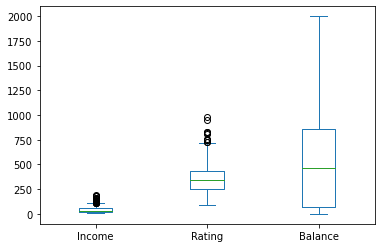

In [18]:
# .plot.box() to get a boxplot for every column selected
df[['Income','Rating','Balance']].plot.box()

Suppose now I want to look at the correlation between two variables in my dataset. I can use a simple *scatterplot* to do so. 

<AxesSubplot:xlabel='Income', ylabel='Rating'>

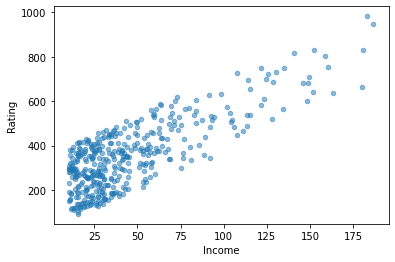

In [25]:
# .plot.scatter(), and specify x and y within the braket
df.plot.scatter(x="Income", y="Rating", alpha=0.5) #alpha determine the transparency of the plot

There is an evident positive correlation between **income** and credit **rating** of individuals. 

Suppose I want to plot the histograms of three variables but I want to have them separated in three different subplots. I can use the **hist** command and specify the dimension of the figure via the option **figsize** and the **subplots=True** assumption. 

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>], dtype=object)

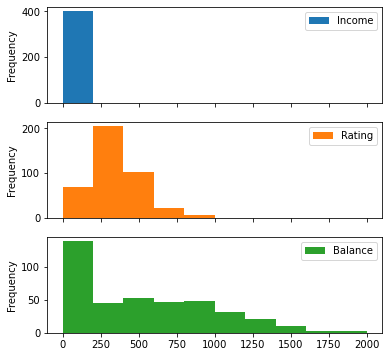

In [35]:
df[['Income','Rating','Balance']].plot.hist(figsize=(6, 6), subplots=True)
# figsize=(length, width)

Finally, we can also look at the correlations and distributions of multiple variables in a very convenient form via the **scatter_matrix** function. 

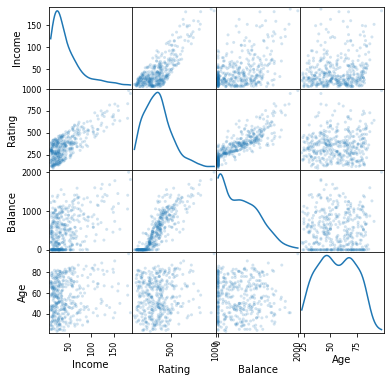

In [39]:
pd.plotting.scatter_matrix(df[['Income','Rating','Balance','Age']], alpha=0.2, figsize=(6, 6), diagonal="kde");
# more options like alpha, figsize, and diagonal
# 'kde' = kernel density estimation
# can also use diagonal='hist'

This gives a much clearer Idea of the possible correlation and distributions of some of the variables of interest. 